In [1]:
#basic packages
import scipy.misc
import random
import numpy as np
import os
import matplotlib.pyplot as plt
# processing bar
from tqdm import tqdm

#import EDSR model
from model_lr_decay import EDSR
from data import load_dataset,crop_center,get_batch,get_test_set

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 1. Test using Bicubic

In [27]:
def PSNR(input,output):
    mse=np.sum((input-output)**2)/(input.shape[0]*input.shape[1])
    psnr=20*np.log10(255.0)-10*np.log10(mse)
    print("the psnr is ",psnr)
    return psnr
    
    

In [3]:
train_set,test_set=load_dataset("D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100",100)
train_set

100


[('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_84.bmp',
  (1, 2)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_44.bmp',
  (4, 1)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_31.bmp',
  (1, 1)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_19.bmp',
  (1, 3)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_94.bmp',
  (2, 0)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_38.bmp',
  (1, 2)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_75.bmp',
  (1, 3)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_87.bmp',
  (1, 2)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_4.bmp',
  (3, 0)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_9.bmp',
  (2, 1)),
 ('D://LAB//master_thesis//EDSR-Tensorflow//dataset//General-100/im_26.bmp',
  (3, 4)),
 ('D://LAB//master_thesis//EDSR-Te

In [6]:
len(test_set)

100

In [3]:
img=scipy.misc.imread(train_set[0][0])


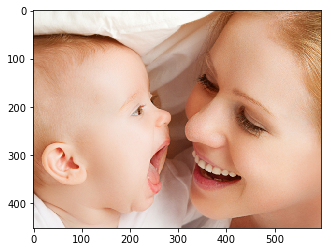

In [6]:
plt.imshow(img)
plt.show()

In [7]:
#downsampling scale is 2: 100/2 =50 
arg=(10,100,50)
x,y,batch_size=get_batch(*arg)

1.0


In [8]:
x[0].shape

(50, 50, 3)

In [32]:
y_out=scipy.misc.imresize(x[0],(100,100),interp='bicubic')

In [33]:
y[0].shape

(100, 100, 3)

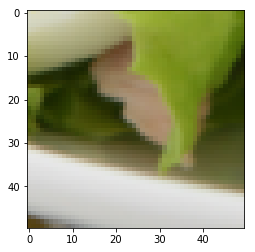

In [34]:
#input batch of train data
plt.imshow(x[0])
plt.show()

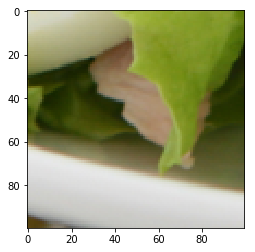

In [35]:
# target data
plt.imshow(y[0])
plt.show()

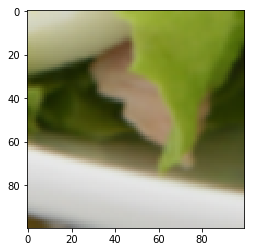

In [36]:
#bicubic data
plt.imshow(y_out)
plt.show()

In [37]:
PSNR(y_out,y[0])

the psnr is  37.5900124726


37.59001247257406

# 1. Train the one batch on one nature image

In [4]:
network = EDSR(50,32,256,2)

Building EDSR...


KeyboardInterrupt: 

In [ ]:
network.train(X_train=x,y_train=y)

In [ ]:
(x-np.mean(x)).shape

# 2. Train the mini-batch on nature image

In [4]:
#network = EDSR(50,32,256,2)
network = EDSR(50,16,64,2) #one base line

Building EDSR...
Done building!


In [5]:
network.set_data_fn(get_batch,(10,100,50),get_test_set,(100,50)) # batch size is 10

In [6]:
network.train()

Begin training...


D:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
D:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


 the time cost is 0.000033 minute------------------]0.03%
 the time cost is 0.890837 minute------------------]3.37%
 the time cost is 1.746389 minute------------------]6.70%
 the time cost is 2.607067 minute------------------]10.03%
 the time cost is 3.468523 minute------------------]13.37%
 the time cost is 4.327010 minute------------------]16.70%
 the time cost is 5.188255 minute------------------]20.03%
 the time cost is 6.049751 minute------------------]23.37%
 the time cost is 6.914634 minute------------------]26.70%
 the time cost is 7.780168 minute------------------]30.03%
 the time cost is 8.646306 minute------------------]33.37%
 the time cost is 9.506322 minute------------------]36.70%
 the time cost is 10.380351 minute-----------------]40.03%
 the time cost is 11.259633 minute-----------------]43.37%
 the time cost is 12.146065 minute-----------------]46.70%
 the time cost is 13.032840 minute-----------------]50.03%
 the time cost is 13.913296 minute-----------------]53.37%


# 3. Compare with bicubic method

In [25]:
def plot_img(dir):
    img=scipy.misc.imread("D://LAB//masterthesis_result//CT_IMAGE//"+str(dir))
    print(img.shape)
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.show()
    return img

(60, 60)


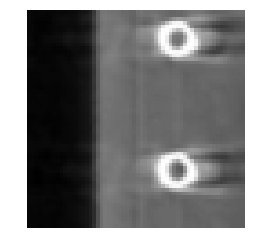

In [26]:
input_img=plot_img("input.png")

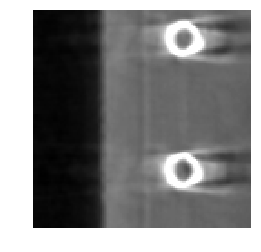

In [22]:
target_img=plot_img("target.png")

D:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
D:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


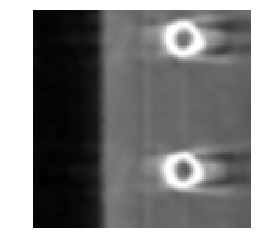

In [23]:
bicubic_img=scipy.misc.imresize(input_img,(120,120),interp='bicubic')
plt.imshow(bicubic_img,cmap='gray')
plt.axis("off")
plt.show()

(120, 120)


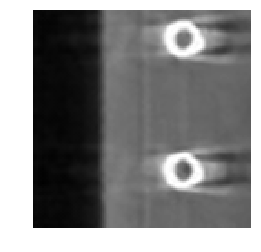

In [29]:
output_img=plot_img("output.png")

In [28]:
PSNR(bicubic_img,target_img)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

the psnr is  39.232808282662184


39.232808282662184

In [30]:
PSNR(output_img,target_img)

the psnr is  42.16773502678824


42.16773502678824